In [55]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [149]:
class perf_analysis():
    
    
    def __init__(self,addr_weight):
        
        #Clean weights file
        self.weights = pd.read_excel(addr_weight)
        self.weights.set_index('Date',inplace=True)
        
        #Extract tickers into a list
        self.lst_tickers = self.weights.columns.values.tolist()
        
    def clean_weights(self,dt_start,dt_end):
        if dt_start < min(self.weights.index.strftime('%Y-%m-%d')):
            raise Exception('Start date before fund inception.')
        else:
            time_period = pd.date_range(dt_start,dt_end)        
            df_weight = self.weights.reindex(time_period,method='ffill')
        return df_weight
    
    def get_data(self,stocks, start, end, field):
        df = yf.download(stocks, start=start, end=end)
        time_period = pd.date_range(start,end)
        df = df.reindex(time_period,method = 'nearest')
        output = df[field]
        return(output)
    
    def cal_perf(self,dt_start,dt_end,str_field ='Adj Close'):
        df_weights = self.clean_weights(dt_start,dt_end)
        
        df_price = self.get_data(self.lst_tickers,dt_start,dt_end,str_field)
        df_period = df_price.loc[dt_start:dt_end,:]
        df_norm = df_period / df_period.iloc[0]
        df_total = df_norm * df_weights
        df_total['Total'] = df_total.sum(axis=1)
        return df_total

    #to prevent direct calling of weights and tickers
    @property
    def port_weights(self):
        return self.weights
    
    @property
    def port_tickers(self):
        return self.lst_tickers
    
    def plot_perf(self,dt_start,dt_end):
        df = self.cal_perf(dt_start,dt_end)
        df = df / df.iloc[0,:]
        ax = df.plot(xlabel = 'Date',ylabel = '',
#                     subplots = True, layout = (5,-1), sharex=True #use -1 in col to auto calculate
                    )



    
        


[*********************100%***********************]  4 of 4 completed


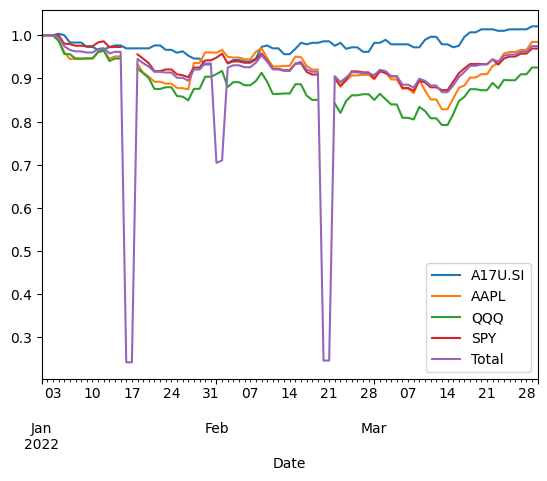

In [151]:
addr_file = r'C:\Users\chins\Downloads\Finance_Test_File.xlsx'
perf = perf_analysis(addr_file)
# perf.clean_weights('2022-01-01','2022-03-30').tail()
# perf.get_data('DJI','2022-01-01','2022-03-30','Adj Close')
# perf.cal_perf('2022-01-01','2022-01-30')
perf.plot_perf('2022-01-01','2022-0-30')

In [152]:
perf.get_data('A17U.SI','2022-01-01','2022-03-30','Adj Close')

[*********************100%***********************]  1 of 1 completed


2022-01-01    2.805186
2022-01-02    2.805186
2022-01-03    2.805186
2022-01-04    2.814663
2022-01-05    2.805186
                ...   
2022-03-26    2.843624
2022-03-27    2.843624
2022-03-28    2.843624
2022-03-29    2.863101
2022-03-30    2.863101
Freq: D, Name: Adj Close, Length: 89, dtype: float64

In [139]:
#         fig,ax  = plt.subplots()
#         ax.plot(df.index,df['Total'])
#         ax = fig.add_subplot(111)
# #         years = mdates.YearLocator()
# #         months = mdates.MonthLocator()
# #         yearsFmt = mdates.DateFormatter('%Y')
        
# #         # format the ticks
# #         ax.xaxis.set_major_locator(years)
# #         ax.xaxis.set_major_formatter(yearsFmt)
# #         ax.xaxis.set_minor_locator(months)
        
# #         # rotates and right aligns the x labels, and moves the bottom of the
# #         # axes up to make room for them
# #         fig.autofmt_xdate()
# #         plt.show()